<H1>TP 1 - Analyse d'un jeu de données</H1>

Nous allons dans ce TP analyser le jeu de données Titanic qui est très largement utilisé dans la communauté. Il concerne les informations concernant les personnes qui étaient à bord du Titanic.  
Les différentes colonnes sont les suivantes :  
    survival: Survival (0 = No; 1 = Yes)  
    pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
    name: Name  
    sex: Sex  
    age: Age  
    sibsp: Number of Siblings/Spouses Aboard  
    parch: Number of Parents/Children Aboard  
    ticket: Ticket Number  
    fare: Passenger Fare  
    cabin: Cabin  
    embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

**Lecture du fichier**  
Récupérer le fichier titanic.csv et le mettre dans le répertoire Dataset.  
Intégrer le contenu de ce fichier dans un dataframe pandas.

In [2]:
import pandas
from IPython.display import display

passengers = pandas.read_csv('Dataset/Titanic.csv', sep='\t')


## Analyse des données

L'objectif dans un premier temps est de se familiariser avec pandas pour obtenir des informations sur le jeu de données.  

**Pandas**  

Afficher la taille du dataframe, les six premières lignes, les trois dernières lignes et 5 lignes au hasard du dataframe.

In [3]:
display(passengers.shape)

display(passengers.head(6))

display(passengers.tail(3))


Taille du dataframe :


(156, 12)


Six premières lignes du dataframe :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q



Trois dernières lignes du dataframe :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


Donner les informations sur le cinquième passager

In [14]:
display(passengers.loc[5])


PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

Donner toutes les informations sur les passagers compris entre les lignes 10 et 16 

In [5]:
display(passengers[10:17])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


Donner les informations sur le passager dont le numéro (PassengerId) est 5

In [7]:
display(passengers[[passengers["PassengerId"] == 5]])



Informations du cinquième passager :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


Indiquer les différentes informations associées aux colonnes (Nom des colonnes, type de la colonne, place prise par le dataframe, etc). 

In [8]:
display(passengers.dtypes)



Informations associées aux colonnes :


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Quel est le type de la colonne *Name* ?

In [7]:
display(passengers["Name"].dtypes)


dtype('O')

Donner des statistiques de base du dataframe et préciser pourquoi Name n'apparait pas dans le résultat.

In [ ]:
display(passengers.describe())


Donner le nombre de survivants? Indication il faut compter combien de PassagerId ont survécu avec la fonction count. 

In [23]:
display(passengers.loc[passengers["Survived"] == 1, ["PassengerId"]].count())


PassengerId    54
dtype: int64

Donner par categorie male/female le nombre de personnes qui ont ou n'ont pas survécu. Indication utilisation d'un groupby.

In [17]:
display(passengers.groupby(["Sex", "Survived"]).count())


PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  16      16    16   15     16     16      16    16   
       1                  40      40    40   32     40     40      40    40   
male   0                  86      86    86   70     86     86      86    86   
       1                  14      14    14    9     14     14      14    14   

                 Cabin  Embarked  
Sex    Survived                   
female 0             0        16  
       1            13        39  
male   0            14        86  
       1             4        14

Donner par categorie de classe le nombre de personnes qui ont ou n'ont pas survécu.

In [16]:
display(passengers.groupby(["Pclass", "Survived"]).count())


PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  18    18   18   17     18     18      18    18   
       1                  12    12   12   10     12     12      12    12   
2      0                  16    16   16   16     16     16      16    16   
       1                  14    14   14   13     14     14      14    14   
3      0                  68    68   68   52     68     68      68    68   
       1                  28    28   28   18     28     28      28    28   

                 Cabin  Embarked  
Pclass Survived                   
1      0            12        18  
       1            12        11  
2      0             1        16  
       1             3        14  
3      0             1        68  
       1             2        28

Donner par categorie de classe et de sexe le nombre de personnes qui ont ou n'ont pas survécu.

In [15]:
display(passengers.groupby(["Pclass", "Sex", "Survived"]).count())


PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex    Survived                                                       
1      female 1                   9     9    8      9      9       9     9   
       male   0                  18    18   17     18     18      18    18   
              1                   3     3    2      3      3       3     3   
2      female 0                   1     1    1      1      1       1     1   
              1                  11    11   11     11     11      11    11   
       male   0                  15    15   15     15     15      15    15   
              1                   3     3    2      3      3       3     3   
3      female 0                  15    15   14     15     15      15    15   
              1                  20    20   13     20     20      20    20   
       male   0                  53    53   38     53     53      53    53   
              1                   8     8    5      8      8       8     8   

                        Cabin  Embarked  
Pclass Sex    Survived                   
1      female 1             9         8  
       male   0            12        18  
              1             3         3  
2      female 0             0         1  
              1             2        11  
       male   0             1        15  
              1             1         3  
3      female 0             0        15  
              1             2        20  
       male   0             1        53  
              1             0         8

Donner la liste des femmes qui ont survécu et dont l'age est supérieure à 30

Donner l'age max, min et moyen des personnes qui ont survécu

## Visualisation 


L'objectif est ici de visualiser quelques informations à l'aide de seaborn pour mettre en évidence les premières analyses précédentes.  

Dans un premier temps à l'aide de seaborn et de la fonction countplot afficher le nombre de survivants et de non survivants

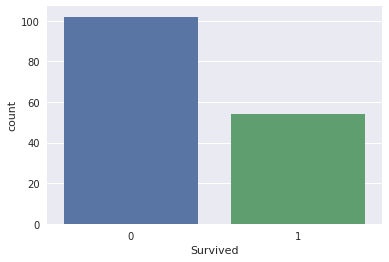

In [32]:
import seaborn as sns
import matplotlib.pyplot as plot

#passengers = sns.load_dataset("titanic")
plot.rcParams["font.family"] = "DejaVu Sans"

sns.countplot(x = "Survived", data = passengers)

plot.show()


Afficher le nombre de catégorie male/female (attribut Sex) avec countplot.

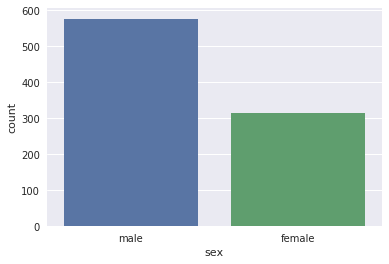

In [21]:
sns.countplot(x = "Sex", data = passengers)

plot.show()


La commande suivante affiche les survivants ou non en fonction du sexe.  

sns.factorplot(x='Survived', col='Sex', kind='count', data=df)

Essayer de l'utiliser et faire de même par rapport aux attributs Pclass et Embarked. Que pouvez vous déduire dans un premier temps sur les survivants ou non.

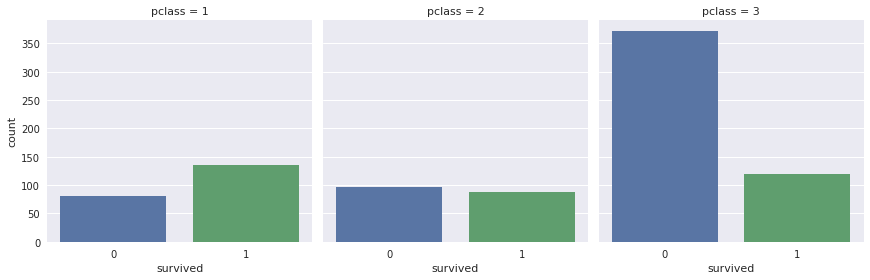

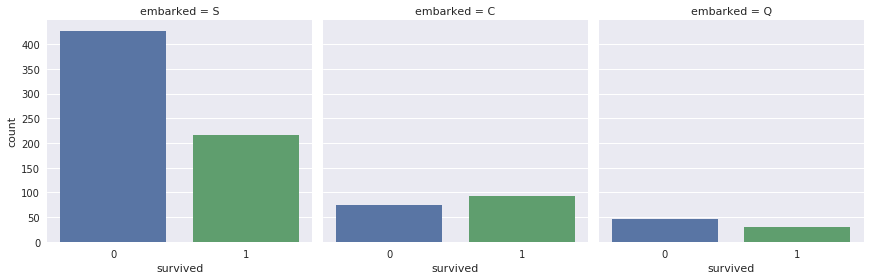

In [24]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data = passengers)
sns.factorplot(x='Survived', col='Embarked', kind='count', data = passengers) 

plot.show()


Un peu plus loin sur l'analyse...  

Le code suivant permet de connaître la répartition par sexe et par classe

Que constatez vous ?

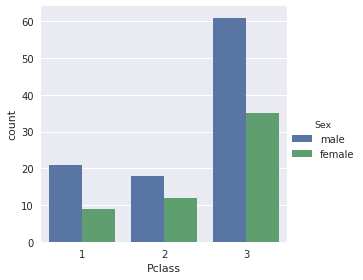

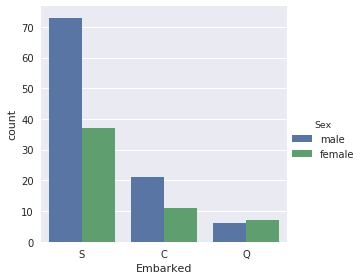

In [33]:
g = sns.factorplot('Pclass', data = passengers, hue = "Sex", kind = "count")
h = sns.factorplot('Embarked', data = passengers, hue = "Sex", kind = "count")


A votre factor plot ajouter col='Survived' comme paramètre pour voir la répartition par rapport au sexe des passagers. Faites de même par rapport à Embarked.

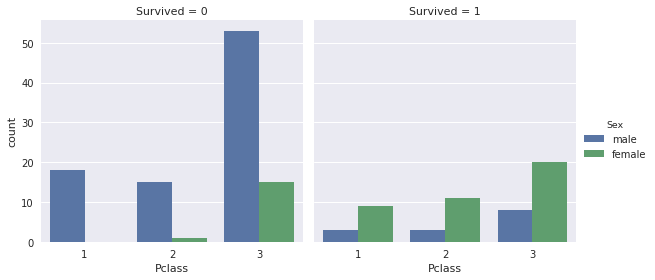

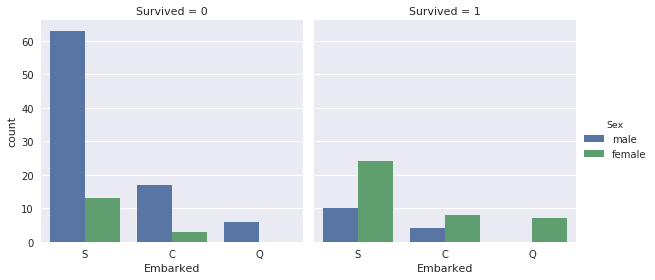

In [34]:
g = sns.factorplot('Pclass', data = passengers, hue = "Sex", kind = "count", col = "Survived")
h = sns.factorplot('Embarked', data = passengers, hue = "Sex", kind = "count", col = "Survived")


Créer la fonction suivante qui permet de créer des catégories en fonction de l'age des personnes.
    Ajouter dans df une colonne 'Person' qui contient la valeur de cet attribut.
    
    Rappel : pour appliquer une fonction à une colonne   
        df[['Age', 'Sex']].apply(male_female_child, axis=1)
        

In [35]:
def male_female_age(passenger):
    age, sex = passenger
    if age < 5:
        return 'Baby'
    if age >= 5 and age < 12:
        return 'Child'
    if age >= 12 and age < 18:
        return 'Teneeger'
    if age >=18 and age < 35:
        return 'Young Adult'
    if age >= 35 and age < 60:
        return 'Adult'
    if age >= 60:
        return 'Senior'
    else:
        return sex
    

In [37]:
passengers["Person"] = passengers[['Age', 'Sex']].apply(male_female_age, axis=1)

display(passengers["Person"])


0      Young Adult
1            Adult
2      Young Adult
3            Adult
4            Adult
5             male
6            Adult
7             Baby
8      Young Adult
9         Teneeger
10            Baby
11           Adult
12     Young Adult
13           Adult
14        Teneeger
15           Adult
16            Baby
17            male
18     Young Adult
19          female
20           Adult
21     Young Adult
22        Teneeger
23     Young Adult
24           Child
25           Adult
26            male
27     Young Adult
28          female
29            male
          ...     
126           male
127    Young Adult
128         female
129          Adult
130    Young Adult
131    Young Adult
132          Adult
133    Young Adult
134    Young Adult
135    Young Adult
136    Young Adult
137          Adult
138       Teneeger
139    Young Adult
140         female
141    Young Adult
142    Young Adult
143    Young Adult
144    Young Adult
145    Young Adult
146    Young Adult
147         

Sur vos factorplot précédents remplacer hue='Sex' par hue='Person' et relancer les. Que constatez vous ?

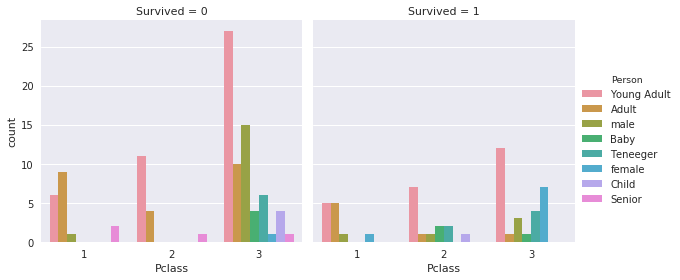

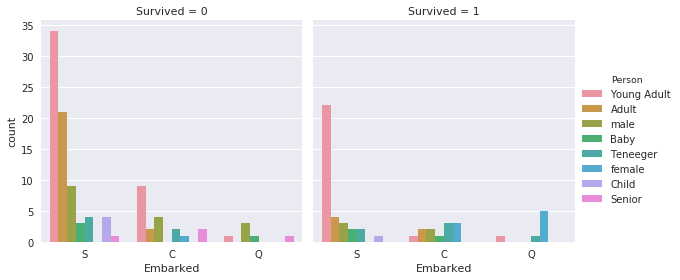

In [38]:
g = sns.factorplot('Pclass', data = passengers, hue = "Person", kind = "count", col = "Survived")
h = sns.factorplot('Embarked', data = passengers, hue = "Person", kind = "count", col = "Survived")


Enfin regarder la répartition pour les embarquements et les classes.

In [ ]:
g = sns.factorplot('Pclass', data = passengers, hue = "Person", kind = "count", col = "Survived")
h = sns.factorplot('Embarked', data = passengers, hue = "Person", kind = "count", col = "Survived")


Quelques informations sur la distribution. A l'aide de distplot afficher la distribution de Pclass et de Fare.

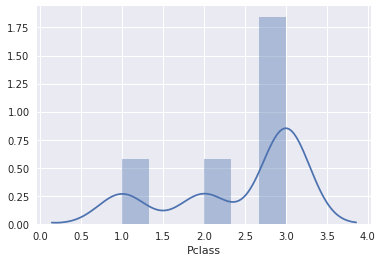

In [43]:
classDistPlot = sns.distplot(passengers["Pclass"])


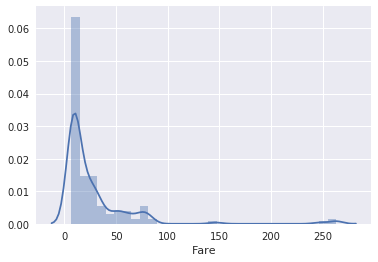

In [44]:
fareDistPlot = sns.distplot(passengers["Fare"])


Afficher à l'aide de la fonction boxplot une boîte à moustache pour Pclass et Fare.



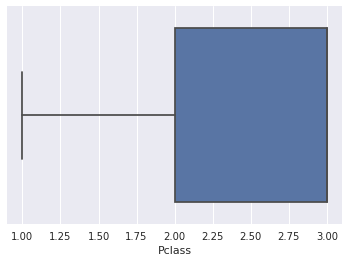

In [45]:
classBoxPlot = sns.boxplot(passengers["Pclass"])


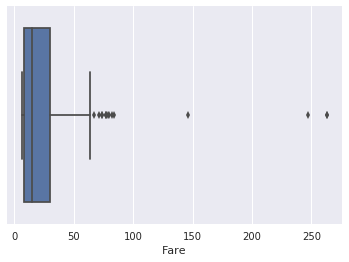

In [46]:
fareBoxPlot = sns.boxplot(passengers["Fare"])


Faire les mêmes opérations à l'aide de la fonction violinplot.  
Rappel : elle offre les mêmes fonctionnalités que les boîtes à moustache mais en plus offre des informations sur une estimation de la densité. 

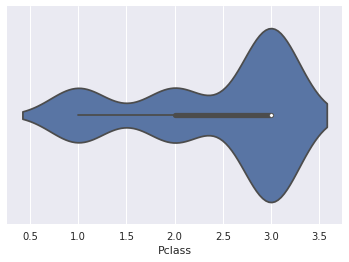

In [47]:
classViolinPlot = sns.violinplot(passengers["Pclass"])


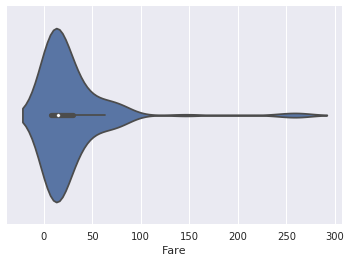

In [48]:
fareViolinPlot = sns.violinplot(passengers["Fare"])


A présent, considérons l'age des personnes. A l'aide de displot afficher l'histogramme de distribution des ages avec le code suivant :

age_dist = sns.distplot(df["Age"])
age_dist.set_title("Distribution des ages")

Que se passe-t'il ?


Une erreur est levée "cannot convert float NaN to integer". NaN indique la présence de valeurs manquantes dans le jeu de données.

## Ingénierie des données 

**Traitement des valeurs manquantes**

Créer un nouveau dataframe df2 (pour créer un dataframe sans modifier le dataframe initial il faut en faire une copie : df2=df.copy()).   



In [49]:
passengersCopy = passengers.copy()


Donner la liste des colonnes pour lesquelles il y a des valeurs manquantes. Pour tester si une valeur est manquante, il est possible pour un dataframe d'utiliser pour une colonne la fonction isnull(). Attention celle-ci retourne un dataframe. Elle doit être suivie par any() pour avoir un booléen :  
        
        df['colonne'].isnull().any()

In [51]:
passengersCopy.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Person         False
dtype: bool

Il est également possible d'afficher l'ensemble des données qui contiennent des valeurs NaN de la manière suivante :

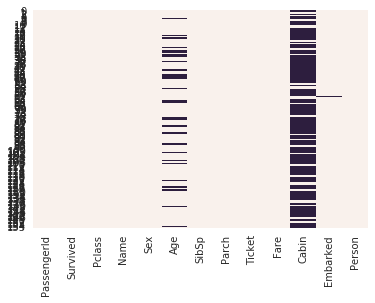

In [53]:
sns.heatmap(passengersCopy.isnull(), cbar = False)


Afficher le nombre de valeurs nulles Embarked, Cabin et Sex.


In [61]:
print(passengersCopy["Embarked"].isnull().sum())
print(passengersCopy["Cabin"].isnull().sum())
print(passengersCopy["Sex"].isnull().sum())


1
125
0


Remplacer les valeurs nulles de l'age par la moyenne des ages des passagers. Penser à vérifier que la transformation a bien été effectuée.

In [66]:
passengersCopy["Age"].fillna(passengersCopy["Age"].mean(), inplace = True)

print(passengersCopy["Age"].isnull().any())


False


Supprimer tous les enregistrements qui contiennent encore une valeur nulle.

In [80]:
#passengersCopy.dropna()

for column in passengersCopy.columns:
    passengersCopy[column].fillna("NULL", inplace = True)
    passengersCopy = passengersCopy[passengersCopy[column].astype(str) != "NULL"]


Utiliser sns.heatmap(df.isnull(), cbar=False) sur votre dataframe pour vérifier qu'il n'y a plus de valeurs nulles. 

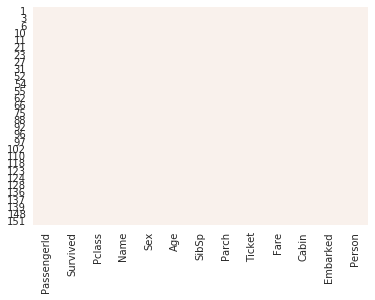

In [81]:
sns.heatmap(passengersCopy.isnull(), cbar = False)


Quelle est la taille de votre dataframa à présent ? Comparer le à la taille initiale.

In [82]:
display(passengers.shape)
display(passengersCopy.shape)


(156, 13)

(30, 13)

En fait en supprimant les valeurs manquantes de cabines de trop nombreux enregristrements ont été effacés. Nous pouvons constater qu'il y a beaucoup de valeurs manquantes pour Cabin et que dans tous les cas elle ne va donc pas pouvoir aider à faire de la classification.

Créer un nouveau dataframe passengers.copy().  
Remplacer la valeur d'age par la médiane.
Par simplification, supprimer la colonne Cabin.
Rappel : pour supprimer une colonne df.drop('Nom colonne',1). Effacer les autres valeurs manquantes.
Enfin, supprimer toutes les valeurs manquantes.

Vérifier à l'aide de heatmap que votre jeu de données n'a plus de valeurs manquantes. Indiquer la taille du jeu de données.


In [ ]:
passengersCopy2 = passengers.copy()
passengersCopy["Age"].fillna(passengersCopy["Age"].mean(), inplace = True)
passengersCopy2.drop(["Cabin"], axis = 1, inplace = True)

#passengersCopy2.dropna()
for column in passengersCopy2.columns:
    passengersCopy2[column].fillna("NULL", inplace = True)
    passengersCopy2 = passengersCopy2[passengersCopy2[column].astype(str) != "NULL"]
    
sns.heatmap(passengersCopy2.isnull(), cbar = False)


Afficher à présent l'histogramme des ages.

**Suppression des colonnes inutiles**

Dans cette étape il convient de supprimer les colonnes qui ne seront pas utiles pour la classification. 
La question à se poser est pour chaque colonne : est ce que cela a un sens de la conserver ?   
Il faut faire des choix qui peut être auront une conséquence sur la classification !!
    
Dans le jeu de données nous voyons qu'il n'y a sans doute pas d'intérêt de conserver le numéro de ticket car il ne semble pas qu'il y ait un codage particulier.  
Le nom des passager semble inutile. Pourtant si l'on regarde un peu attentivement (df3.display()) on peut se rendre compte qu'il existe des titres différents (Mr., Master, Miss, Rev., Mrs. etc) qui pourraient avoir un impact sur la classification.  
L'identifiant du passager n'apporte pas d'information.  

Effacer les différentes colonnes : 'Ticket', 'Name' et 'PassengerId'.

    

Un petit retour sur la colonne Person.  
A l'aide de display(df3.iloc[131] que constatez vous ? 

La fonction ayant été appliquée avant le traitement des valeurs manquantes toutes celles qui étaient manquantes ont été remplacées par le sexe de la personne. Supprimer la colonne Person.

** Attributs continus **

Il y a deux attributs continus dans le jeu de données. Age et Fare.  

Transformer à l'aide de la fonction cut l'attribut Age de manière à ce que les valeurs puissent prendre en compte les valeurs suivantes : 
   bins = (0, 5, 12, 18, 25, 35, 60, 120)  
   group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']   

Transformer à l'aide de la fonction cut l'attribut Fare de manière à ce que les valeurs puissent prendre en compte les valeurs suivantes : 
    bins = (0, 8, 15, 31, 1000)  
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile']



** Attribut catégoriel**


Pour connaître les attributs catégoriels faire un df.info(). Les attributs catégoriels apparaissent avec comme type object ou category.

In [ ]:
print(passengersCopy2.info())


Il y a 4 attributs catégoriels à présent dans le jeu de données. Pour chacun d'entre eux transformer les en valeur numérique à l'aide de la fonction LabelEncoder().

## Sauvegarde du fichier transformé 

A présent sauvegarder le fichier modifié avec comme tabulateur des ';' en conservant l'entête.

In [ ]:
passengersCopy2.to_csv("Dataset/Titanic2.csv", sep = ';')


Vérifier que votre fichier a été correctement sauvegardé. 

In [ ]:
newPassengers = pandas.read_csv('Dataset/Titanic2.csv', sep = ';')
newPassengers.head()
